# OpenAI GPT Moderation
- Analyzing how OpenAI moderates text

Source: https://github.com/malywut/gpt_examples/blob/main/Chap2_04_Moderation/run.py

**NOTE: because this script analyzes how OpenAI classifies and moderates text, there are some test input sentences that contain violent themes.**

## Getting environment set up

In [1]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.3/312.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.3 MB/s eta 0:00:00


In [2]:
import os
from openai import OpenAI
os.environ['OPENAI_API_KEY'] = "API_KEY" # Enter your API Key here :)

client = OpenAI()

## Sending the input to OpenAI's moderation model

In [4]:
# Calling the openai Moderation endpoint, text-moderation-latest model
response = client.moderations.create(model='text-moderation-latest',
input = "I want to hurt my neighbor")

In [5]:
print(response) # Extracting the response

ModerationCreateResponse(id='modr-9JtD6WiOa7y3Ok6qynl8Fh1d0wrNG', model='text-moderation-007', results=[Moderation(categories=Categories(harassment=False, harassment_threatening=False, hate=False, hate_threatening=False, self_harm=False, self_harm_instructions=False, self_harm_intent=False, sexual=False, sexual_minors=False, violence=True, violence_graphic=False, self-harm=False, sexual/minors=False, hate/threatening=False, violence/graphic=False, self-harm/intent=False, self-harm/instructions=False, harassment/threatening=False), category_scores=CategoryScores(harassment=0.03970562666654587, harassment_threatening=0.1373758465051651, hate=0.005039206240326166, hate_threatening=9.292263712268323e-05, self_harm=0.0006296610808931291, self_harm_instructions=4.2503819486228167e-07, self_harm_intent=0.0002808429708238691, sexual=0.00016071276331786066, sexual_minors=1.7470657098783704e-07, violence=0.9706390500068665, violence_graphic=2.6747975425678305e-05, self-harm=0.0006296610808931291

## Playing with the result

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Listing the categories in the response
response.results[0].categories

Categories(harassment=False, harassment_threatening=False, hate=False, hate_threatening=False, self_harm=False, self_harm_instructions=False, self_harm_intent=False, sexual=False, sexual_minors=False, violence=True, violence_graphic=False, self-harm=False, sexual/minors=False, hate/threatening=False, violence/graphic=False, self-harm/intent=False, self-harm/instructions=False, harassment/threatening=False)

### Defining functions for analysis

In [66]:
def access_data(dictionary):
  '''
  Takes in a dictionary version of response, puts keys and data into separate
  lists for data representation.
  '''
  # Separating the dictionary keys (category names) from the category scores (idea help from ChatGPT)
  keys = list(dictionary.keys())
  data = [dictionary[data_in_dict] for data_in_dict in dictionary]

  return keys, data

In [64]:
def bar_plot(x, y, xlabel, ylabel, title, rotation=True):
  '''
  Takes in the x and y coordinate data, as well as the labels, title, and whether to rotate or not, and plots a bar plot with the data.
  '''
  plt.bar(x, y, color='thistle')
  plt.xlabel(str(xlabel))
  plt.ylabel(str(ylabel))
  plt.title(str(title))

  if rotation == True:
    plt.xticks(rotation=75)

  plt.show()

In [71]:
def pie_plot(x, labels, title):
  '''
  Makes a pie plot from percentage data & labels.
  '''
  plt.pie(x, labels=labels, rotatelabels=True, autopct='%1.2f%%', colors=plt.cm.tab20.colors) # Formatting help from ChatGPT
  plt.title(str(title))
  plt.figure(figsize=(20, 30))
  plt.show()

In [90]:
def category_analysis(title):
  '''
  Performs a brief analysis on the categorical data from the text moderation model's response.
  Pulling from the bar and pie plot functions, as well as the access_data function above.
  '''

  # Extracting the categories as a dictionary
  dictionary = response.results[0].category_scores.__dict__

  # Extracting the keys and data from the dictionary
  keys, data = access_data(dictionary=dictionary)

  # Defining two subplots on the same axis: shows bar & pie plots on same line
  figure, axis = plt.subplots(1, 2, figsize=(15, 6)) # Formatting help from ChatGPT

  # Plotting the bar plot
  axis[0].bar(keys, data)
  axis[0].set_xlabel('Category')
  axis[0].set_ylabel('Categorical Value')
  plt.sca(axis[0])  # Set the current axis to axs[0] for xticks rotation (ChatGPT)
  plt.xticks(rotation=75)  # Rotate x-axis labels (ChatGPT)
  axis[0].set_title('Bar Plot: ' + str(title))

  # Plotting the pie chart
  axis[1].pie(data, labels=keys, autopct='%1.1f%%', colors=plt.cm.tab20.colors)
  axis[1].set_title('Pie Plot: ' + str(title))

  # Showing the two plots
  plt.show()

### input = "I want to hurt my neighbor"

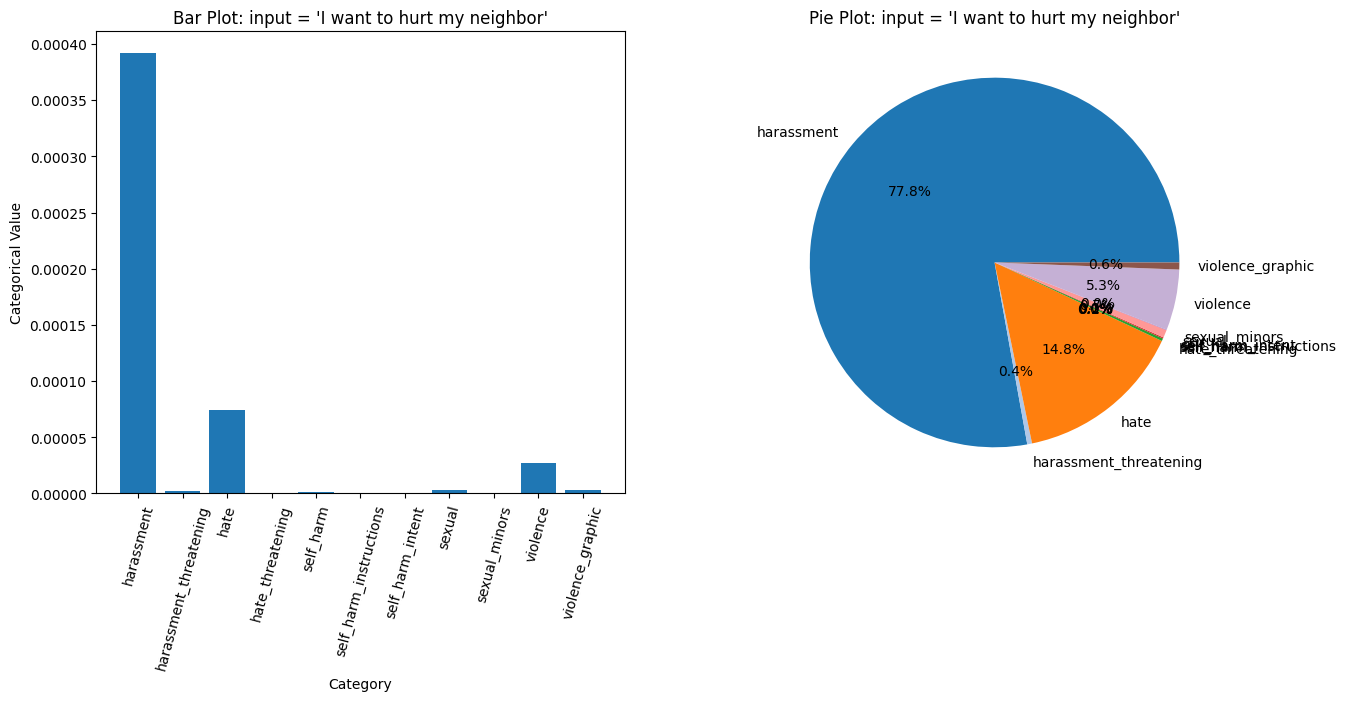

In [103]:
category_analysis("input = 'I want to hurt my neighbor'")

In [104]:
# Seeing if the response was flagged
response.results[0].flagged

False

### input = 'I want to kill my neighbor'

In [105]:
# Calling the openai Moderation endpoint, text-moderation-latest model
response = client.moderations.create(model='text-moderation-latest',
input = "I want to kill my neighbor")

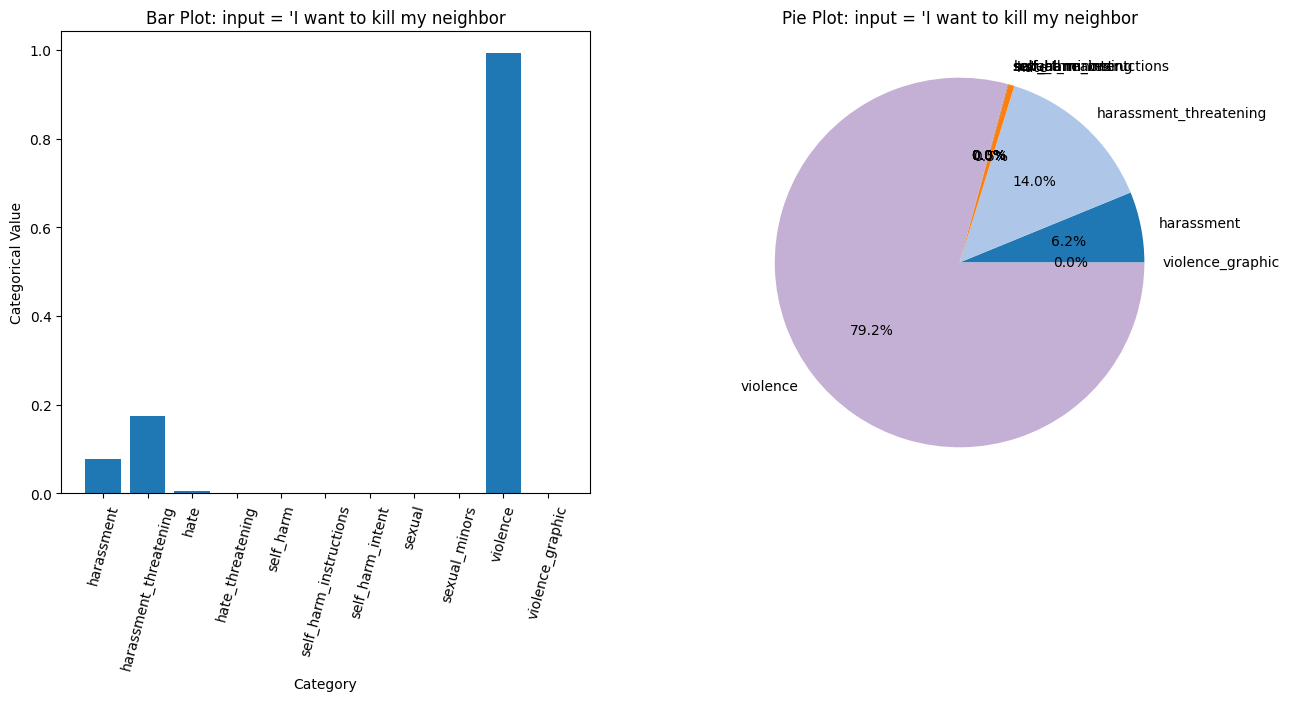

In [106]:
category_analysis("input = 'I want to kill my neighbor")

In [107]:
# Seeing if the response was flagged
response.results[0].flagged

True

### input = 'I do not like tacos'

In [108]:
# Calling the openai Moderation endpoint, text-moderation-latest model
response = client.moderations.create(model='text-moderation-latest',
input = "I do not like tacos")

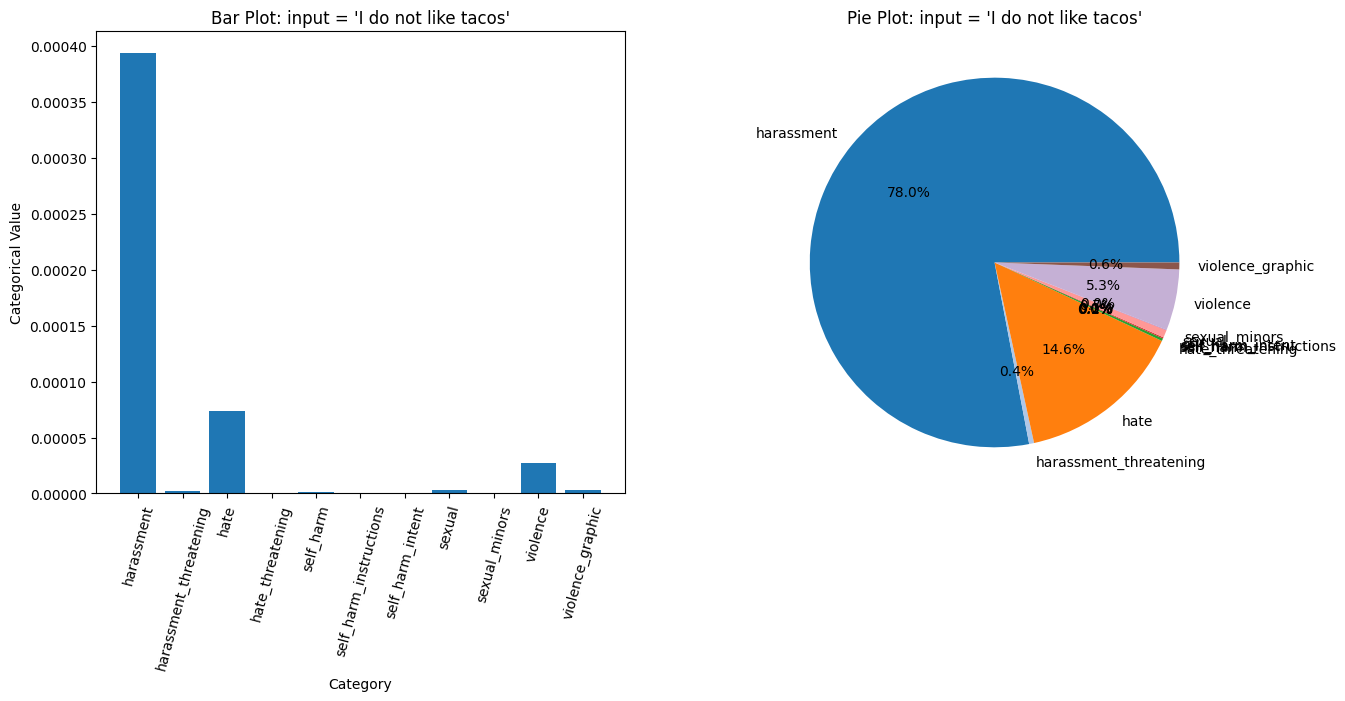

In [109]:
category_analysis("input = 'I do not like tacos'")

In [110]:
# Seeing if the response was flagged
response.results[0].flagged

False

### input = 'I am a pervert and I want to hurt a child'

In [111]:
# Calling the openai Moderation endpoint, text-moderation-latest model
response = client.moderations.create(model='text-moderation-latest',
input = "I am a pervert and I want to hurt a child")

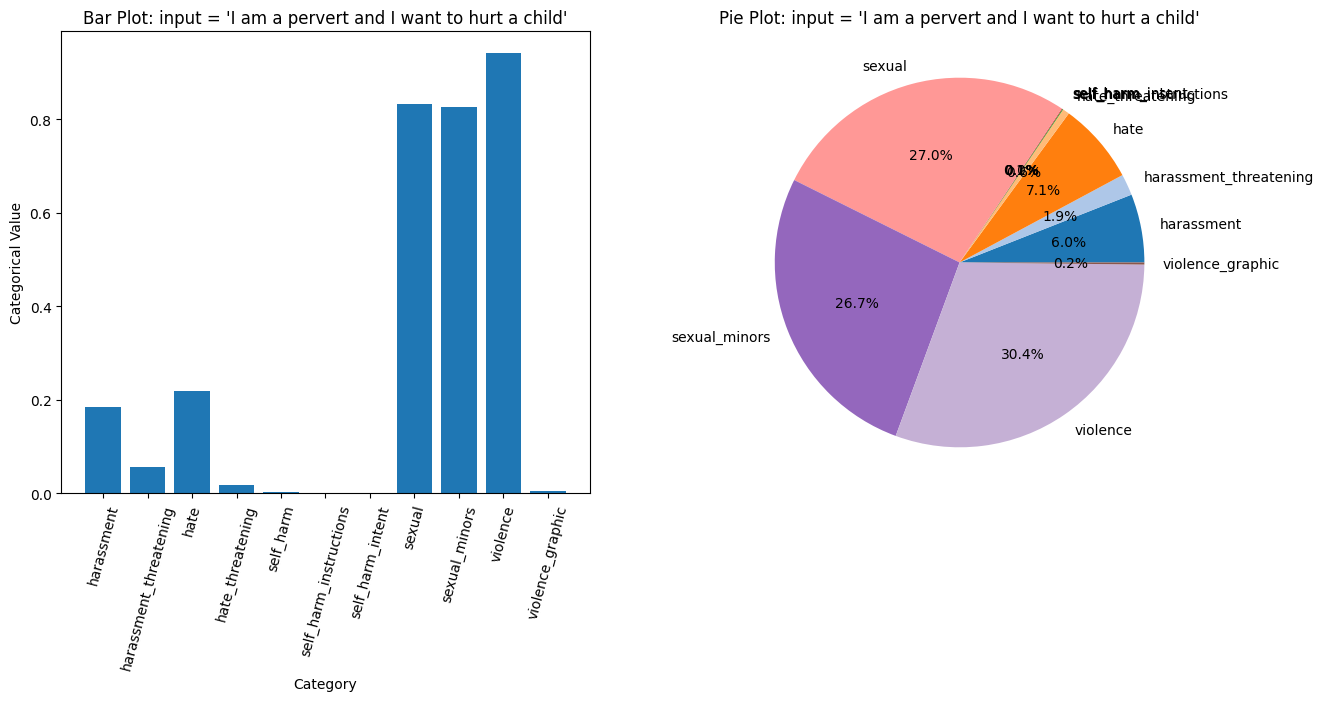

In [112]:
category_analysis("input = 'I am a pervert and I want to hurt a child'")

In [113]:
# Seeing if the response was flagged
response.results[0].flagged

True

### input = 'I have a gun'

In [118]:
# Calling the openai Moderation endpoint, text-moderation-latest model
response = client.moderations.create(model='text-moderation-latest',
input = "I have a gun")

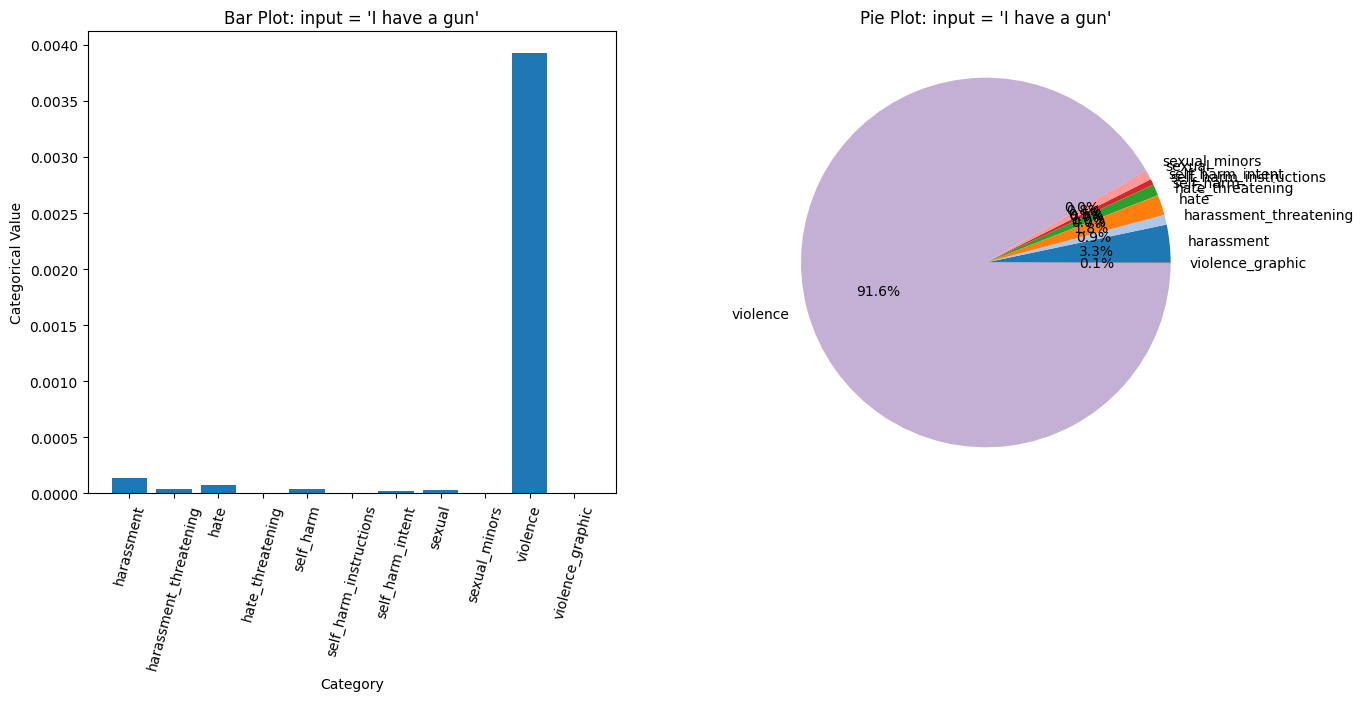

In [119]:
category_analysis("input = 'I have a gun'")

In [120]:
# Seeing if the response was flagged
response.results[0].flagged

False